In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.  Pandas Series  
Pandas series 是一个像数组一样的一维对象，可以存储很多类型的数据，例如数字或字符串。Pandas Series 和 NumPy ndarray 之间的主要区别之一是你可以为 Pandas Series 中的每个元素分配索引标签   
### 1.1 Series的创建

In [3]:
# 创建一个Series
obj = pd.Series([11, 2, 3, 4])
obj

0    11
1     2
2     3
3     4
dtype: int64

In [4]:
# 获取Series的值
obj.values

array([11,  2,  3,  4], dtype=int64)

In [5]:
# 获取Series的索引
obj.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
# 创建一个带有对各个数据点进行标记的索引的Series
obj2 = pd.Series([1 ,2 ,3, 4], index=['a', 'b', 'c', 'd'])
obj2

a    1
b    2
c    3
d    4
dtype: int64

In [7]:
class Obj:
    def __str__(self):
        pass
    def __repr__(self):
        pass

'a    1\nb    2\nc    3\nd    4\ndtype: int64'

In [8]:
# 通过字典创建
obj3 = pd.Series({
    'a': 1,
    'b': 2
})
obj3

a    1
b    2
dtype: int64

In [12]:
# size
print(obj.size)
# shape
print(obj.shape)
# ndim
print(obj.ndim)

4
(4,)
1


### 1.2 Series的取值
可以通过索引的方式选取Series中的单个或一组值

In [13]:
# 取出一个值
obj2['a']

1

In [14]:
# 取出若干值,注意[]里是一个list
obj2[['a', 'c']]

a    1
c    3
dtype: int64

In [15]:
# 根据值的条件取值
obj2[obj2 > 2]

c    3
d    4
dtype: int64

In [16]:
# 检查索引
'a' in obj2

True

In [17]:
'x' in obj2

False

In [18]:
1 in [1, 2, 3]

True

### 1.3 Series的赋值

In [19]:
# 改变某个值
obj2['a'] = 100
obj2

a    100
b      2
c      3
d      4
dtype: int64

### 1.4 Series其他常用操作


In [22]:
obj[1] = 11

In [23]:
# 按值统计
obj.value_counts()

11    2
4     1
3     1
dtype: int64

In [29]:
obj

1    11
0    11
3     4
2     3
dtype: int64

In [28]:
# 按值排序
obj.sort_values(ascending=False, inplace=True)

In [32]:
obj2

a    100
b      2
c      3
d      4
dtype: int64

In [30]:
# 计算值的和
obj2.sum()

109

In [33]:
# 计算值的数量
obj.count()

4

In [34]:
obj2.count()

4

## 2. Pandas DataFrame
Pandas DataFrames 是具有带标签的行和列的二维数据结构，可以存储很多类型的数据。如果你熟悉 Excel 的话，可以将 Pandas DataFrames 看做类似于电子表格。DataFrame既有行索引也有列索引，它可以被看做由Series组成的字典（共用同一个索引）。   
### 2.1 DataFrame创建

In [2]:
# 通过字典创建
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [20]:
a = frame.reset_index().values
a

array([[0, 'Ohio', 2000, 1.5],
       [1, 'Ohio', 2001, 1.7],
       [2, 'Ohio', 2002, 3.6],
       [3, 'Nevada', 2001, 2.4],
       [4, 'Nevada', 2002, 2.9],
       [5, 'Nevada', 2003, 3.2]], dtype=object)

In [17]:
np.matmul(frame[:3], frame[:3])

TypeError: Object arrays are not currently supported

In [37]:
frame.columns

Index(['state', 'year', 'pop'], dtype='object')

In [38]:
# 指定列顺序
frame = pd.DataFrame(data, columns=['state', 'pop', 'year'])
frame

,state,pop,year
0,Ohio,1.5,2000
1,Ohio,1.7,2001
2,Ohio,3.6,2002
3,Nevada,2.4,2001
4,Nevada,2.9,2002
5,Nevada,3.2,2003


In [40]:
# 指定行索引
frame = pd.DataFrame(data, columns=['state', 'pop', 'year'], index=['a', 'b', 'c', 'd', 'e', 'f'])
frame

,state,pop,year
a,Ohio,1.5,2000
b,Ohio,1.7,2001
c,Ohio,3.6,2002
d,Nevada,2.4,2001
e,Nevada,2.9,2002
f,Nevada,3.2,2003


In [43]:
# shape
print(frame.shape)
# size
print(frame.size)
# ndim
print(frame.ndim)

(6, 3)
18
2


In [44]:
# DataFrame的值
frame.values

array([['Ohio', 1.5, 2000],
       ['Ohio', 1.7, 2001],
       ['Ohio', 3.6, 2002],
       ['Nevada', 2.4, 2001],
       ['Nevada', 2.9, 2002],
       ['Nevada', 3.2, 2003]], dtype=object)

In [45]:
# DataFrame的行索引
frame.index

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [46]:
# DataFrame的列索引
frame.columns

Index(['state', 'pop', 'year'], dtype='object')

In [47]:
# 数据信息概要describe
frame.describe()

,pop,year
count,6.000000,6.000000
mean,2.550000,2001.500000
std,0.836062,1.048809
min,1.500000,2000.000000
25%,1.875000,2001.000000
50%,2.650000,2001.500000
75%,3.125000,2002.000000
max,3.600000,2003.000000


### 2.2 DataFrame取值

In [48]:
# head()
frame['state']

a      Ohio
b      Ohio
c      Ohio
d    Nevada
e    Nevada
f    Nevada
Name: state, dtype: object

In [52]:
frame.pop

<bound method NDFrame.pop of     state  pop  year
a    Ohio  1.5  2000
b    Ohio  1.7  2001
c    Ohio  3.6  2002
d  Nevada  2.4  2001
e  Nevada  2.9  2002
f  Nevada  3.2  2003>

In [49]:
type(frame['state'])

pandas.core.series.Series

In [54]:
# 切片
frame[1:3:2]

,state,pop,year
b,Ohio,1.7,2001


In [56]:
frame

,state,pop,year
a,Ohio,1.5,2000
b,Ohio,1.7,2001
c,Ohio,3.6,2002
d,Nevada,2.4,2001
e,Nevada,2.9,2002
f,Nevada,3.2,2003


In [55]:
# 取一行,数字索引
frame.iloc[1]

state    Ohio
pop       1.7
year     2001
Name: b, dtype: object

In [57]:
# 取一行，非数字索引
frame.loc['a']

state    Ohio
pop       1.5
year     2000
Name: a, dtype: object

In [59]:
# 取多行,数字索引
frame.iloc[1:5]

,state,pop,year
b,Ohio,1.7,2001
c,Ohio,3.6,2002
d,Nevada,2.4,2001
e,Nevada,2.9,2002


In [61]:
# 取多行， 字符索引
frame.loc[['a', 'b', 'c']]

,state,pop,year
a,Ohio,1.5,2000
b,Ohio,1.7,2001
c,Ohio,3.6,2002


In [62]:
# 取多行，条件索引
def f(x):
    print(x)
    return x.year % 2 == 0

frame.loc[f]

    state  pop  year
a    Ohio  1.5  2000
b    Ohio  1.7  2001
c    Ohio  3.6  2002
d  Nevada  2.4  2001
e  Nevada  2.9  2002
f  Nevada  3.2  2003


,state,pop,year
a,Ohio,1.5,2000
c,Ohio,3.6,2002
e,Nevada,2.9,2002


In [63]:
# 取一列的值
frame['year']

a    2000
b    2001
c    2002
d    2001
e    2002
f    2003
Name: year, dtype: int64

In [64]:
# 取多列的值
frame[['year', 'pop']]

,year,pop
a,2000,1.5
b,2001,1.7
c,2002,3.6
d,2001,2.4
e,2002,2.9
f,2003,3.2


In [66]:
# 指定行 指定列, iloc
frame.iloc[2:5, [1, 2]]

,pop,year
c,3.6,2002
d,2.4,2001
e,2.9,2002


In [68]:
# 指定行 指定列, loc
frame.loc[['a', 'c'], ['pop', "year"]]

,pop,year
a,1.5,2000
c,3.6,2002


### 2.3 DataFrame赋值

In [69]:
frame[:2]

,state,pop,year
a,Ohio,1.5,2000
b,Ohio,1.7,2001


In [71]:
# 整行赋值 iloc
frame.iloc[0] = ['new', 1.8, 3000]

In [72]:
frame

,state,pop,year
a,new,1.8,3000
b,new,1.8,3000
c,Ohio,3.6,2002
d,Nevada,2.4,2001
e,Nevada,2.9,2002
f,Nevada,3.2,2003


In [75]:
# 整列赋值
frame['pop'] = range(6)
frame

,state,pop,year
a,new,0,3000
b,new,1,3000
c,Ohio,2,2002
d,Nevada,3,2001
e,Nevada,4,2002
f,Nevada,5,2003


In [77]:
# 赋值 at[]
frame.at['a', 'pop'] = 100
frame

,state,pop,year,"(a, pop)"
a,new,100,3000,100
b,new,1,3000,100
c,Ohio,2,2002,100
d,Nevada,3,2001,100
e,Nevada,4,2002,100
f,Nevada,5,2003,100


In [79]:
frame.columns

Index(['state', 'pop', 'year', ('a', 'pop')], dtype='object')

In [83]:
# 赋值 iat[]
frame.iat[1, 3] = 200
frame

,state,pop,year,"(a, pop)"
a,new,100,3000,100
b,new,1,3000,200
c,Ohio,2,2002,100
d,Nevada,3,2001,100
e,Nevada,4,2002,100
f,Nevada,5,2003,100


### 2.4 DataFrame删除

In [85]:
# 删除列
frame.drop(columns=('a', 'pop'), inplace=True)
frame

,state,pop,year
a,new,100,3000
b,new,1,3000
c,Ohio,2,2002
d,Nevada,3,2001
e,Nevada,4,2002
f,Nevada,5,2003


In [88]:
# 删除行
frame.drop(index='a', inplace=True)
frame

,state,pop,year
b,new,1,3000
c,Ohio,2,2002
d,Nevada,3,2001
e,Nevada,4,2002
f,Nevada,5,2003


### 2.4 DataFrame 新增

In [89]:
# 新增行
frame.loc['a'] = ["new", 0, 2019]
frame

,state,pop,year
b,new,1,3000
c,Ohio,2,2002
d,Nevada,3,2001
e,Nevada,4,2002
f,Nevada,5,2003
a,new,0,2019


In [90]:
# 新增列
frame['new_year'] = 2019
frame

,state,pop,year,new_year
b,new,1,3000,2019
c,Ohio,2,2002,2019
d,Nevada,3,2001,2019
e,Nevada,4,2002,2019
f,Nevada,5,2003,2019
a,new,0,2019,2019


### 2.5 DataFrame 处理缺失数据

在许多数据分析工作中，缺失数据是经常发生的。pandas的目标之一就是尽量轻松
地处理缺失数据。例如，pandas对象的所有描述性统计默认都不包括缺失数据。
缺失数据在pandas中呈现的方式有些不完美，但对于大多数用户可以保证功能正
常。对于数值数据，pandas使用浮点值NaN（Not a Number）表示缺失数据。

#### 2.5.1 删除Nan数据

In [91]:
NA = np.nan
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])

In [92]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [93]:
# 观察数据中是否有nan
data.isnull()

,0,1,2
0,False,False,False
1,False,True,True
2,True,True,True
3,True,False,False


In [94]:
# 统计nan
data.isnull().sum()

0    2
1    2
2    2
dtype: int64

In [95]:
# dropna, 删除带有nan的行
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [98]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [99]:
# 只删除所有带Nan列
data[2] = NA
data

,0,1,2
0,1.0,6.5,NaN
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,NaN


In [100]:
data.dropna(axis=1, how='all')

,0,1
0,1.0,6.5
1,1.0,NaN
2,NaN,NaN
3,NaN,6.5


#### 2.5.2 填充Nan数据

In [101]:
# 全部填充为0
data.fillna(0)

,0,1,2
0,1.0,6.5,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,6.5,0.0


In [102]:
# 只填充前2行
data.fillna(1, limit=2)

,0,1,2
0,1.0,6.5,1.0
1,1.0,1.0,1.0
2,1.0,1.0,NaN
3,1.0,6.5,NaN


In [104]:
data

,0,1,2
0,1.0,6.5,NaN
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,NaN


In [106]:
# 选择填充方式 {'backfill', 'bfill', 'pad', 'ffill', None}
data.fillna(method='bfill')

,0,1,2
0,1.0,6.5,NaN
1,1.0,6.5,NaN
2,NaN,6.5,NaN
3,NaN,6.5,NaN


In [107]:
#### 2.5.2 填充Nan数据的另一种方式interpolate
help(data.interpolate)

Help on method interpolate in module pandas.core.generic:

interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction='forward', limit_area=None, downcast=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Interpolate values according to different methods.
    
    Please note that only ``method='linear'`` is supported for
    DataFrames/Series with a MultiIndex.
    
    Parameters
    ----------
    method : {'linear', 'time', 'index', 'values', 'nearest', 'zero',
              'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh',
              'polynomial', 'spline', 'piecewise_polynomial',
              'from_derivatives', 'pchip', 'akima'}
    
        * 'linear': ignore the index and treat the values as equally
          spaced. This is the only method supported on MultiIndexes.
          default
        * 'time': interpolation works on daily and higher resolution
          data to interpolate given length of interval
        * 'index', 'va

### 2.6 分组 groupby

In [166]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],                 
                   'key2' : ['one', 'two', 'one', 'two', 'one'],                    
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.154215,-0.031716
1,a,two,1.002053,-0.933990
2,b,one,1.878286,-1.440541
3,b,two,1.232200,-0.215233
4,a,one,-0.253690,-1.680832


In [167]:
# 按key1进行分组，并计算data1列的平均值
df['data1'].groupby(df['key1']).sum()

key1
a   -0.405852
b    3.110486
Name: data1, dtype: float64

In [168]:
# 按key1, key2进行分组，并计算平均值
df['data1'].groupby([df['key1'], df['key2']]).mean()

key1  key2
a     one    -0.703952
      two     1.002053
b     one     1.878286
      two     1.232200
Name: data1, dtype: float64

In [112]:
# 使用 agg
df['data1'].groupby(df['key1']).agg('mean')

key1
a   -0.285022
b   -0.127809
Name: data1, dtype: float64

## 3. pandas 画图

In [ ]:
df = pd.DataFrame()
help(df.plot)

### 3.1 折线图
优点： 直观反映数据变化趋势

缺点：数据集太小时显示不直观

适用场景：需要反映变化趋势，关联性。

适用数据：时间序列类数据、关联类数据（如电流跟随电压变化而变化）

In [116]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [117]:
ts.head(10)

2000-01-01   -0.831965
2000-01-02    0.323870
2000-01-03   -0.490750
2000-01-04   -0.288150
2000-01-05    1.620199
2000-01-06   -0.213756
2000-01-07   -0.076908
2000-01-08   -0.758955
2000-01-09   -1.453502
2000-01-10   -0.516917
Freq: D, dtype: float64

In [121]:
ts.plot?

In [ ]:
ts.cumsum().plot

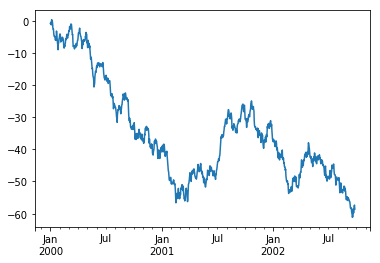

In [122]:
# 走势图，plot, kind='line'
ts.cumsum().plot(kind='line')

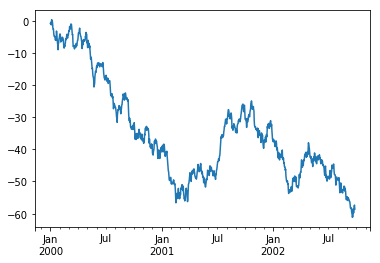

In [123]:
# 走势图，plot.line
ts.cumsum().plot.line()

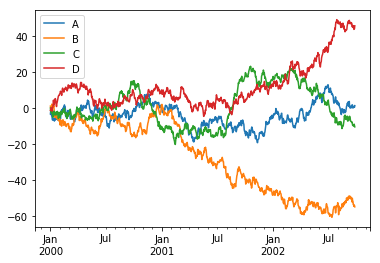

In [131]:
# 复合折线图
df3 = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df3.cumsum().plot()

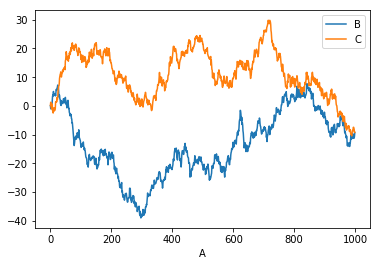

In [132]:
# 指定x和y
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x="A", y=['B', 'C'])

### 3.2 柱状图

优点：人眼对高度较敏感，直观各组数据差异性，强调个体与个体之间的比较

缺点：不适合大量的数据集数据（项数较多）

适用场景：一个维度数据比较、数据单纯性展示、排序数据展示

适用数据： 数据集不大， 二维数据

In [133]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2

,a,b,c,d
0,0.542471,0.534738,0.878506,0.965234
1,0.935139,0.475544,0.190025,0.650366
2,0.599078,0.764630,0.986414,0.946601
3,0.363949,0.488644,0.888097,0.045162
4,0.525046,0.798530,0.598959,0.888110
5,0.550895,0.131404,0.074120,0.152120
6,0.172739,0.692808,0.797780,0.428989
7,0.892746,0.313132,0.815891,0.132697
8,0.586545,0.612957,0.338181,0.112610
9,0.869915,0.250206,0.571821,0.602964


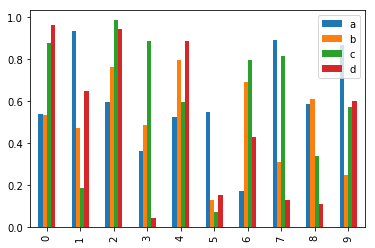

In [137]:
# 柱状图
df2.plot.bar()

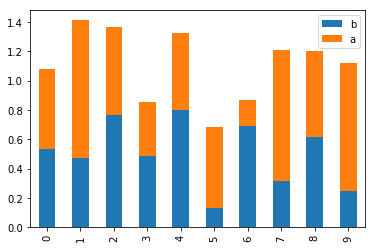

In [140]:
# 堆积形状
df2[['b', 'a']].plot.bar(stacked=True)

### 3.3 直方图

优点：直方图描述的是一组数据的频次分布， 有助于我们知道数据的分布情况，诸如众数、中位数的大致位置、数据是否存在缺口或者异常值。

缺点：频率分布直方图的原始数据不能在图中表示出来，这就使一些基本信息丢失。

适用场景：产品质量的分布情况，判断和预测产品质量及不合格率等。


In [141]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df4.head()

,a,b,c
0,1.078932,0.584400,-0.181387
1,1.125979,-0.553297,-1.688870
2,2.953010,-1.677613,0.241017
3,1.272575,0.287516,-1.316898
4,1.502903,-1.332089,-2.059406


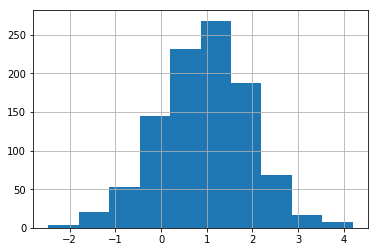

In [144]:
df4['a'].hist()

### 3.4 箱线图

优点：不受异常值的影响，能够准确稳定地描绘出数据的离散分布情况，同时也利于数据的清洗。

缺点：不能精确地衡量数据分布的偏态和尾重程度；对于批量比较大的数据，反映的信息更加模糊以及用中位数代表总体评价水平有一定的局限性。

适用场景：观察分布情况，判断异常值等。

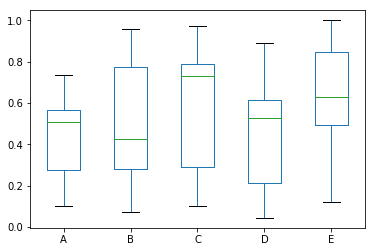

In [145]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()

In [146]:
df.describe()

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.446678,0.513976,0.573465,0.468386,0.629265
std,0.218699,0.315318,0.306995,0.296391,0.293593
min,0.102807,0.070400,0.103141,0.043674,0.120278
25%,0.275975,0.281944,0.287787,0.210811,0.491833
50%,0.507612,0.426728,0.731932,0.527906,0.628896
75%,0.567358,0.774557,0.788122,0.615004,0.848107
max,0.735714,0.957171,0.973014,0.888494,0.999733


### 3.6 面积图

优点：强调数量随时间而变化的程度，也可用于引起人们对总值趋势的注意。   
其他参考折线图

In [ ]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'], 
                  index=pd.date_range('1/1/2019', periods=10))


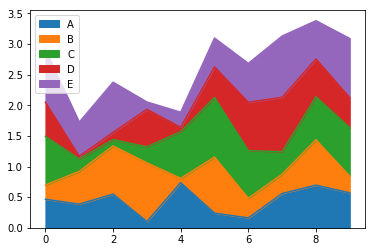

In [147]:
df.plot.area()

### 3.7 散点图
优点： 直观反映数据集中情况，对离散数据线性回归等曲线预测性的拟合辅助作用

缺点：适用场景比较少

适用场景：两个维度比较（地图某地区某项数据集中分布，机器学习中可视化二分类问题），对离散数据进行预测时

适用数据：离散值数据

In [150]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

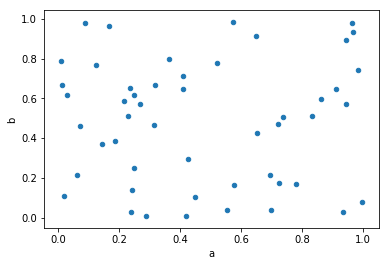

In [152]:
# 显示多类
df.plot.scatter(x='a', y='b')

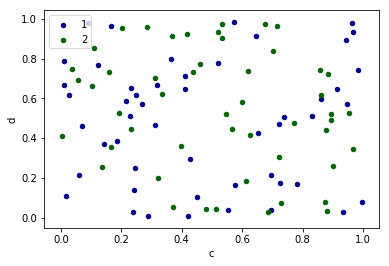

In [154]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='2', ax=ax)

### 3.8 热力图

优点： 以直观反应出热点分布，区域聚集等数据信息，颜色最深的地方表示数据最集中。

适用场景：查找最感兴趣区域


In [156]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)

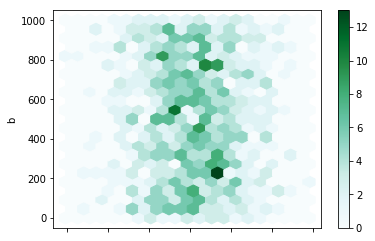

In [158]:
df.plot.hexbin(x='a', y='b', gridsize=20)

### 3.9 饼状图

优点： 直观显示各项占总体的占比，分布情况，强调整个与个体间的比较。

缺点：数据不精细，不适合分类较多的情况

适用场景：一个维度各项指标（一般不超过5个项目）占总体的占比情况，分布情况。（例如：不同状态下的车辆分布，公司内各个团队营收收入）

适用数据：具有整体意义的各项相同数据

In [162]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])

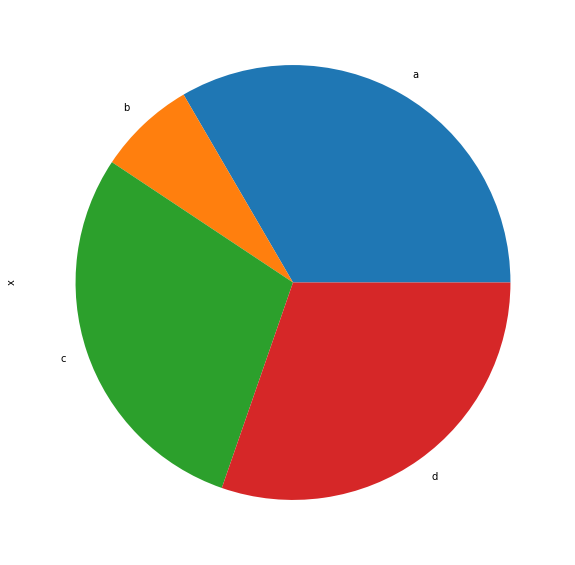

In [164]:
df['x'].plot.pie(figsize=(10, 10))

### 3.10 直方图与柱状图的区别

1. 直方图展示数据的分布，柱状图比较数据的大小。
2. 直方图X轴为定量数据，柱状图X轴为分类数据。  
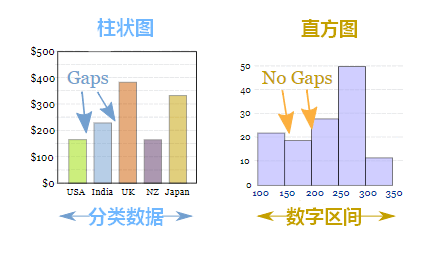

## 参考文献
http://pandas.pydata.org/pandas-docs/stable/